# Exercises for Week 6

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

## Image binarization

#### Manual thresholding

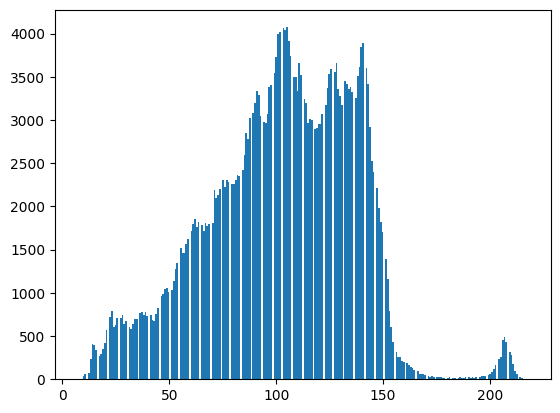

In [2]:
# read an image as grayscale
img_org = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
#img_org = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE) #try some other images

#Plotting the histogram might give an idea of good thesholds
plt.hist(img_org.ravel(), bins=255);

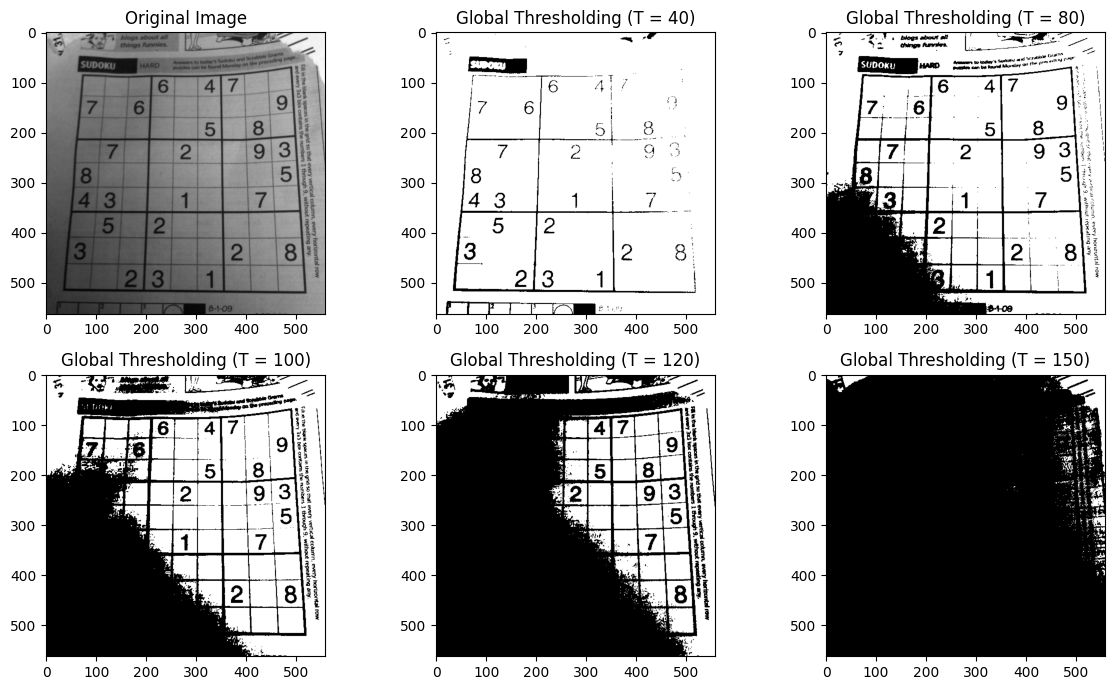

In [3]:
# manually set a global threshold
_, ax = plt.subplots(2, 3, figsize=(12, 7))
ax = ax.flatten()
# plot orig

ax[0].imshow(img_org, 'gray')
ax[0].set_title('Original Image')

for i, threshold in enumerate([40, 80, 100, 120, 150]):
    _, img_th1 = cv2.threshold(img_org, threshold, 255, cv2.THRESH_BINARY)
    ax[i+1].imshow(img_th1, 'gray')
    ax[i+1].set_title(f'Global Thresholding (T = {threshold})')

plt.tight_layout()

#### Otsu's method

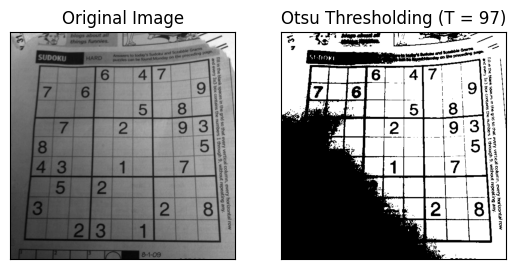

In [4]:
# thresholding using Otsu's method
thresh_otsu, img_th2 = cv2.threshold(img_org, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(img_org, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_th2, 'gray')
plt.title(f'Otsu Thresholding (T = {thresh_otsu:.0f})')
plt.xticks([]), plt.yticks([])

plt.show()

#### Local (adaptive) thresholding

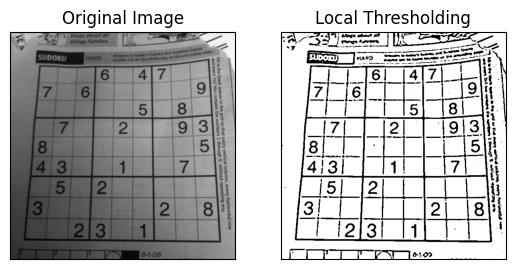

In [5]:
# denoising
img_denoised = cv2.medianBlur(img_org, 5)

# local thresholding
img_th3 = cv2.adaptiveThreshold(img_denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(img_org, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_th3, 'gray')
plt.title(f'Local Thresholding')
plt.xticks([]), plt.yticks([])

plt.show()

## Edge extraction

#### Sobel operator

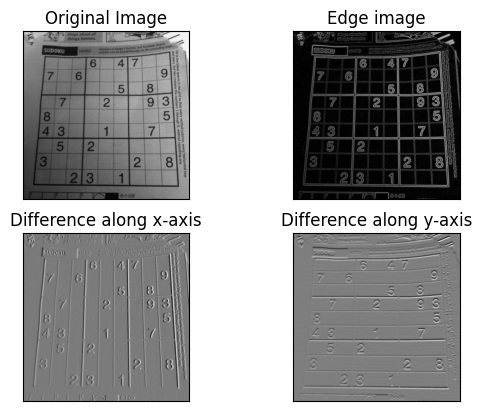

In [6]:
# compute difference along x and y axes using Sobel operator
sobel_x = cv2.Sobel(img_org, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_org, cv2.CV_64F, 0, 1, ksize=5)

# compute square root
img_sqrt = np.sqrt(sobel_x**2 + sobel_y**2)

# plot results
plt.subplot(2, 2, 1)
plt.imshow(img_org, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(img_sqrt, 'gray')
plt.title('Edge image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(sobel_x, 'gray')
plt.title('Difference along x-axis')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4)
plt.imshow(sobel_y, 'gray')
plt.title('Difference along y-axis')
plt.xticks([]), plt.yticks([])

plt.show()

#### Canny detector

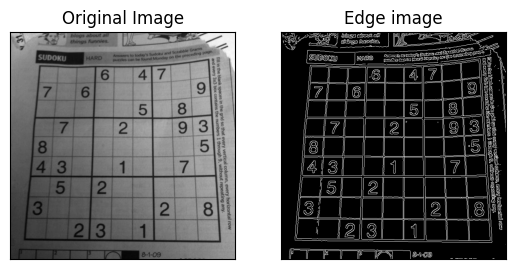

In [7]:
# extract edge using Canny detector
img_canny = cv2.Canny(img_org, 50, 60, apertureSize=3)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(img_org, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_canny, 'gray')
plt.title('Edge image')
plt.xticks([]), plt.yticks([])

plt.show()

#### Laplacian of Gaussian

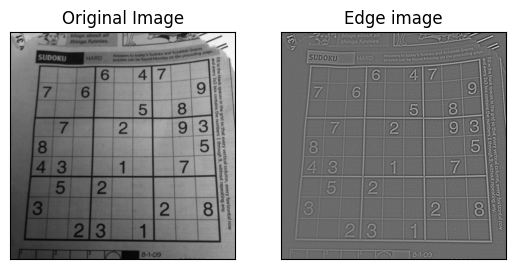

In [8]:
# we use a two step method here for demonstration
img_blurred = cv2.GaussianBlur(img_org, (5, 5), 0)
img_laplacian = cv2.Laplacian(img_blurred, cv2.CV_64F)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(img_org, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_laplacian, 'gray')
plt.title('Edge image')
plt.xticks([]), plt.yticks([])

plt.show()

## Shape matching (Hough transform)

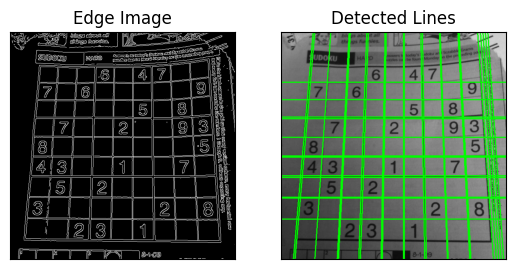

In [9]:
# apply Hough Transform to detect lines
# parameters: 
#   1: distance resolution in pixels.
#   np.pi/180: Angle resolution in radians.
#   200: threshold - minimum number of intersections to detect a line.
lines = cv2.HoughLines(img_canny, 1, np.pi / 180, 200)

# draw detected lines
img_hough_rgb = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        
        # convert polar coordinates to cartesian endpoints for drawing
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        # these points define a line that extends beyond the image for visualization
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_hough_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(img_canny, cmap='gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_hough_rgb)
plt.title('Detected Lines')
plt.xticks([]), plt.yticks([])

plt.show()

## Template matching

#### Without rotation compensation

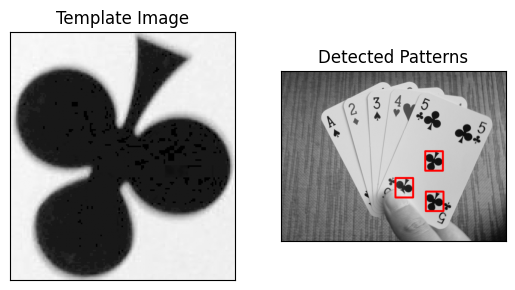

In [10]:
# load image and template
img_org = cv2.imread('cards.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape  # w: template height, h: template width

# apply template matching
method = cv2.TM_CCORR_NORMED
res = cv2.matchTemplate(img_org, template, method)

# set a threshold to detect multiple matches
threshold = 0.9
loc = np.where(res >= threshold)

# collect bounding boxes and scores
boxes = []
scores = []
for pt in zip(*loc[::-1]):
    boxes.append([pt[0], pt[1], h, w])
    scores.append(float(res[pt[1], pt[0]]))

# apply non-maximum suppression
indices = cv2.dnn.NMSBoxes(boxes, scores, threshold, 0.3)

# convert original image to RGB for plotting
img_res_rgb = cv2.cvtColor(img_org.copy(), cv2.COLOR_GRAY2RGB)
if len(indices) > 0:
    for i in indices.flatten():
        x, y, width, height = boxes[i]
        cv2.rectangle(img_res_rgb, (x, y), (x + width, y + height), (255, 0, 0), 15)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_res_rgb)
plt.title('Detected Patterns')
plt.xticks([]), plt.yticks([])

plt.show()

#### With rotation compensation

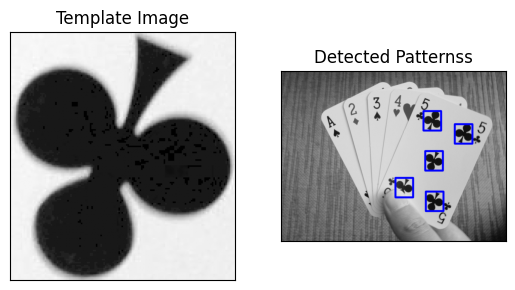

In [11]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and determine the center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    
    # get the rotation matrix for the given angle
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    
    # compute the sine and cosine (absolute values)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    
    # perform the actual rotation and return the image
    out = cv2.warpAffine(image, M, (nW, nH))

    return out

# apply template matching with rotation compensation and collect bboxes
boxes = []
scores = []
for angle in np.arange(0, 360, 10):
    rotated_template = rotate_bound(template, angle)
    rH, rW = rotated_template.shape
    res = cv2.matchTemplate(img_org, rotated_template, method)
    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        boxes.append([pt[0], pt[1], rW, rH])
        scores.append(float(res[pt[1], pt[0]]))

# apply non-maximum suppression 
indices = cv2.dnn.NMSBoxes(boxes, scores, threshold, 0.3)

# convert original image to RGB for plotting
img_res_rgb = cv2.cvtColor(img_org.copy(), cv2.COLOR_BGR2RGB)
if len(indices) > 0:
    for i in indices:
        i = i[0] if isinstance(i, (list, tuple, np.ndarray)) else i
        x, y, bw, bh = boxes[i]
        cv2.rectangle(img_res_rgb, (x, y), (x + bw, y + bh), (0, 0, 255), 15)

# plot results
plt.subplot(1, 2, 1)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_res_rgb)
plt.title('Detected Patternss')
plt.xticks([]), plt.yticks([])

plt.show()